# Decision tree to predict diabetes



In [2]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df_raw = pd.read_csv(url)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_raw.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
26,7,147,76,0,0,39.4,0.257,43,1
734,2,105,75,0,0,23.3,0.560,53,0
497,2,81,72,15,76,30.1,0.547,25,0
162,0,114,80,34,285,44.2,0.167,27,0
633,1,128,82,17,183,27.5,0.115,22,0


In [5]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df_raw[df_raw['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [7]:
df_filter = df_raw.copy()
df_filter = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
df_filter

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
print('The observations that have BMI, blood pressure or glucose equal to zero are removed.')
print(f'By doing this we lose {len(df_raw)-len(df_filter)} observations.')

The observations that have BMI, blood pressure or glucose equal to zero are removed.
By doing this we lose 44 observations.


### Basic EDA

In [8]:
df = df_filter.copy() 

In [10]:
# Split the dataset so to avoid bias

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [11]:
# Join the train sets to ease insights

df_train = pd.concat([X_train, y_train], axis=1)

In [14]:
# Get basic info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 534 to 273
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               543 non-null    int64  
 1   Glucose                   543 non-null    int64  
 2   BloodPressure             543 non-null    int64  
 3   SkinThickness             543 non-null    int64  
 4   Insulin                   543 non-null    int64  
 5   BMI                       543 non-null    float64
 6   DiabetesPedigreeFunction  543 non-null    float64
 7   Age                       543 non-null    int64  
 8   Outcome                   543 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB


In [15]:
# Take a sample

df_train.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0
306,10,161,68,23,132,25.5,0.326,47,1
469,6,154,78,41,140,46.1,0.571,27,0
311,0,106,70,37,148,39.4,0.605,22,0
344,8,95,72,0,0,36.8,0.485,57,0
301,2,144,58,33,135,31.6,0.422,25,1
43,9,171,110,24,240,45.4,0.721,54,1
346,1,139,46,19,83,28.7,0.654,22,0
618,9,112,82,24,0,28.2,1.282,50,1
288,4,96,56,17,49,20.8,0.340,26,0


In [16]:
# Describe the numerical and date variables

df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,3.931860,121.517495,72.217311,20.799263,81.182320,32.411050,0.459812,33.504604,0.346225
std,3.415419,30.550230,12.331249,15.897221,111.224474,6.840723,0.310118,12.262484,0.476205
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.450000,0.241000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,45.000000,32.200000,0.364000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.606000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,680.000000,67.100000,2.420000,81.000000,1.000000


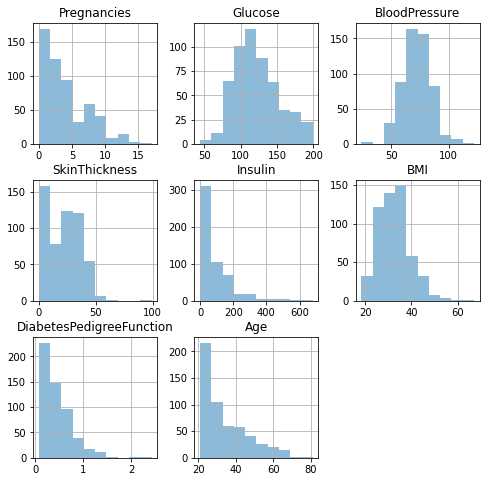

In [17]:
# Perform univariate analysis - histograms

X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()

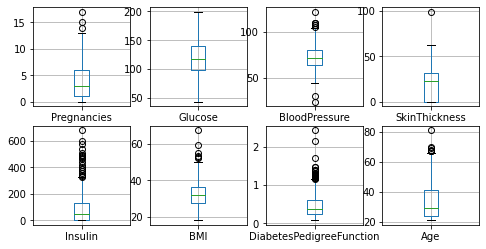

In [20]:
# Perform univariate analysis - boxplots

fig, ax = plt.subplots(2,4, figsize=(8,4))
axs = ax.flatten()
for i in range(len(axs)):
    X_train._get_numeric_data().iloc[:,i].to_frame().boxplot(ax=axs[i])

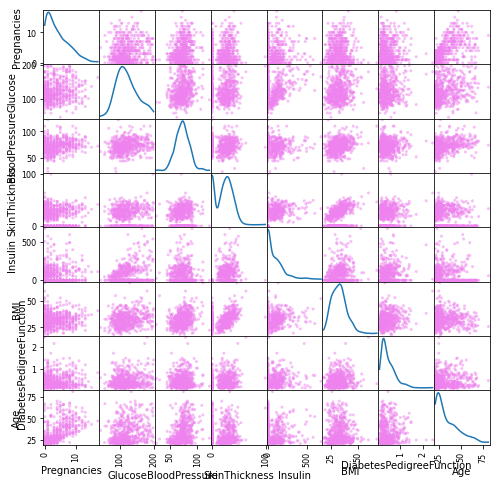

In [21]:
# Perform bivariate analysis - numericals

pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

<AxesSubplot:>

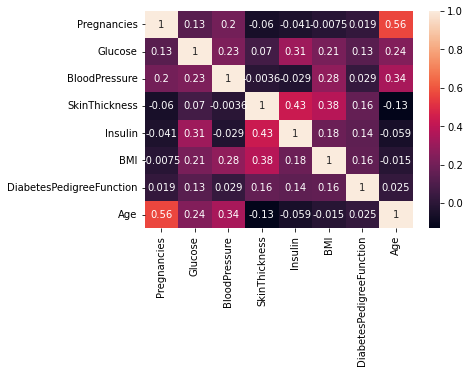

In [22]:
sns.heatmap(X_train.corr(),annot=True)

In [23]:
# Target variable

df_train['Outcome'].value_counts()

0    355
1    188
Name: Outcome, dtype: int64

In [24]:
# Analyze effect on response variable (DV)

df_train.corr().style.background_gradient(cmap='Blues')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128695,0.203663,-0.059651,-0.041003,-0.007470,0.019356,0.562590,0.214185
Glucose,0.128695,1.000000,0.228245,0.069994,0.313630,0.214476,0.126815,0.241120,0.476305
BloodPressure,0.203663,0.228245,1.000000,-0.003589,-0.029131,0.276175,0.028567,0.340978,0.182279
SkinThickness,-0.059651,0.069994,-0.003589,1.000000,0.434014,0.378657,0.160786,-0.131113,0.103272
Insulin,-0.041003,0.313630,-0.029131,0.434014,1.000000,0.180870,0.144517,-0.059335,0.154062
BMI,-0.007470,0.214476,0.276175,0.378657,0.180870,1.000000,0.155318,-0.014559,0.303647
DiabetesPedigreeFunction,0.019356,0.126815,0.028567,0.160786,0.144517,0.155318,1.000000,0.024778,0.231706
Age,0.562590,0.241120,0.340978,-0.131113,-0.059335,-0.014559,0.024778,1.000000,0.228164
Outcome,0.214185,0.476305,0.182279,0.103272,0.154062,0.303647,0.231706,0.228164,1.000000


- Glucose and BMI have a relatively high correlation with the target variable.

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

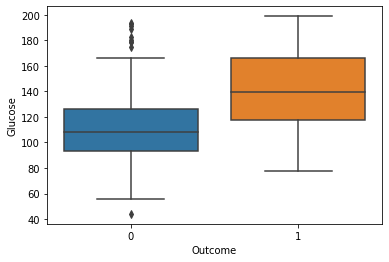

In [27]:
sns.boxplot(x="Outcome", y="Glucose", data=df_train)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

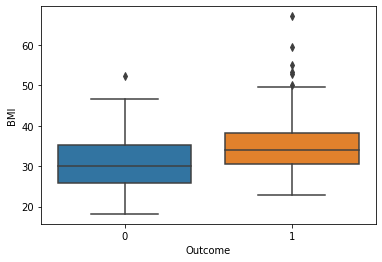

In [28]:
sns.boxplot(x="Outcome", y="BMI", data=df_train)

- Glucose seem to be a useful feature to separate between people with and without diabetes.

### Start modeling: Decision tree

In [29]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

clf.fit(X_train, y_train)
print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.7182320441988951


In [30]:
clf_pred=clf.predict(X_test)

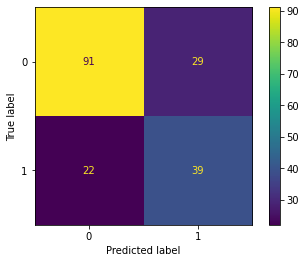

In [31]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()

plt.show()

In [32]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       120
           1       0.57      0.64      0.60        61

    accuracy                           0.72       181
   macro avg       0.69      0.70      0.69       181
weighted avg       0.73      0.72      0.72       181



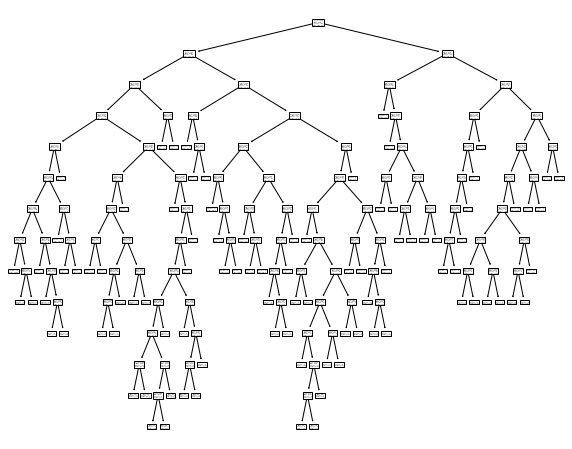

In [17]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()

Tree and CV

In [15]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split':range(1,10), 'min_samples_leaf': range(1,5)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, n_jobs=-1,cv=3)
grid.fit(X_train, y_train) # fit the model at each grid point and keep the scores


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scala

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [16]:
grid.best_params_ 

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [17]:
model_cv = grid.best_estimator_ # Parameter setting that gave the best results on the hold out data.

In [18]:
grid.best_score_ # Mean cross-validated score of the best_estimator

0.7661141804788213

In [23]:
y_pred = model_cv.predict(X_test)

print('Accuracy of tree selected by CV in test set:',np.mean(y_test['Outcome']==y_pred))

Accuracy of tree selected by CV in test set: 0.7071823204419889


In [24]:
# Another way to calculate the accuracy (more direct)

print('Accuracy of tree selected by CV in test set:',grid.score(X_test, y_test))

# aca como se que esta calculando el score en el modelo estimado con X_train?

Accuracy of tree selected by CV in test set: 0.7071823204419889


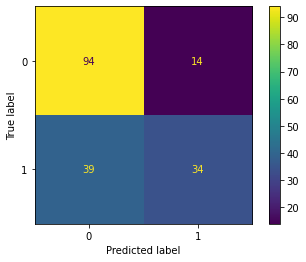

In [50]:
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=grid.classes_)
disp.plot()

plt.show()

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       108
           1       0.71      0.47      0.56        73

    accuracy                           0.71       181
   macro avg       0.71      0.67      0.67       181
weighted avg       0.71      0.71      0.69       181



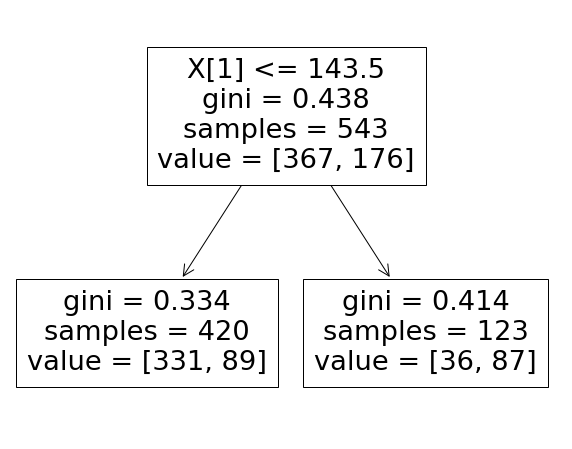

In [56]:
plt.figure(figsize=(10,8))
tree.plot_tree(model_cv)
plt.show()

Random forest...

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train)

print('Accuracy random forest:',rfc.score(X_test, y_test))

Accuracy random forest: 0.7182320441988951


/tmp/ipykernel_975/2642730952.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
